# Kapitel 0: Einführung in die Statistik

> **Leitfrage:** Wie kommt man von den „rohen Zahlen" zu begründeten Aussagen und Entscheidungen?

> **Lernziele:**  
> (i) grundlegende Begriffe der Statistik sauber verwenden,  
> (ii) statistische Fragestellungen präzise formulieren und  
> (iii) den Unterschied zwischen Deskription und Induktion erklären.

---

**Autor:** Karsten Keßler  
**Zielgruppe:** Studierende der Informatik

In [3]:
# Benötigte Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

# Konfiguration für bessere Darstellung
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
np.random.seed(42)  # Für Reproduzierbarkeit

# Pandas-Ausgabe konfigurieren
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 100)

---

## Was bedeutet „Statistik"?

Der Begriff **Statistik** wird in der Praxis in drei typischen Bedeutungen verwendet:

### 1. Statistik als Datenmaterial

Veröffentlichte Zahlen, Tabellen oder Kennzahlen  
(z. B. Umsatzstatistik, Arbeitslosenstatistik, Wahlstatistik).  

→ Statistik als **Ergebnis** einer Datenerhebung.

**💻 Informatik-Beispiele:**
- Server-Uptime-Statistiken
- GitHub-Repository-Statistiken (Stars, Forks, Commits)
- App-Store-Bewertungsstatistiken
- Website-Traffic-Reports

In [4]:
# Beispiel: Statistik als Datenmaterial - Server-Uptime-Report
server_stats = {
    'Server': ['web-01', 'web-02', 'db-01', 'cache-01', 'api-01'],
    'Uptime (%)': [99.95, 99.87, 99.99, 99.92, 99.78],
    'Requests/Tag': [1_250_000, 980_000, 450_000, 2_100_000, 750_000],
    'Avg Response (ms)': [45, 52, 12, 3, 89],
    'Errors/Tag': [125, 187, 5, 42, 215]
}

df_stats = pd.DataFrame(server_stats)
print("=" * 60)
print("SERVER-STATISTIK (Beispiel für 'Statistik als Datenmaterial')")
print("=" * 60)
print(df_stats.to_string(index=False))
print("\n→ Dies sind die 'rohen Zahlen' - aber was bedeuten sie?")

SERVER-STATISTIK (Beispiel für 'Statistik als Datenmaterial')
  Server  Uptime (%)  Requests/Tag  Avg Response (ms)  Errors/Tag
  web-01       99.95       1250000                 45         125
  web-02       99.87        980000                 52         187
   db-01       99.99        450000                 12           5
cache-01       99.92       2100000                  3          42
  api-01       99.78        750000                 89         215

→ Dies sind die 'rohen Zahlen' - aber was bedeuten sie?


### 2. Statistik als Methode

Verfahren zur **Erhebung**, **Aufbereitung**, **Darstellung** und **Analyse** von Daten:  
Häufigkeitstabellen, Diagramme, Mittelwert/Varianz, Modelle, Tests.

**💻 Informatik-Beispiele:**
- Log-Analyse und Aggregation
- A/B-Testing-Frameworks
- Performance-Monitoring-Tools (Grafana, Prometheus)
- Machine-Learning-Evaluationsmetriken

LOG-ANALYSE (Beispiel für 'Statistik als Methode')

Anzahl Messungen: 1000
Mittelwert: 62.29 ms
Median: 55.29 ms
Standardabweichung: 33.68 ms
95%-Percentil: 126.28 ms


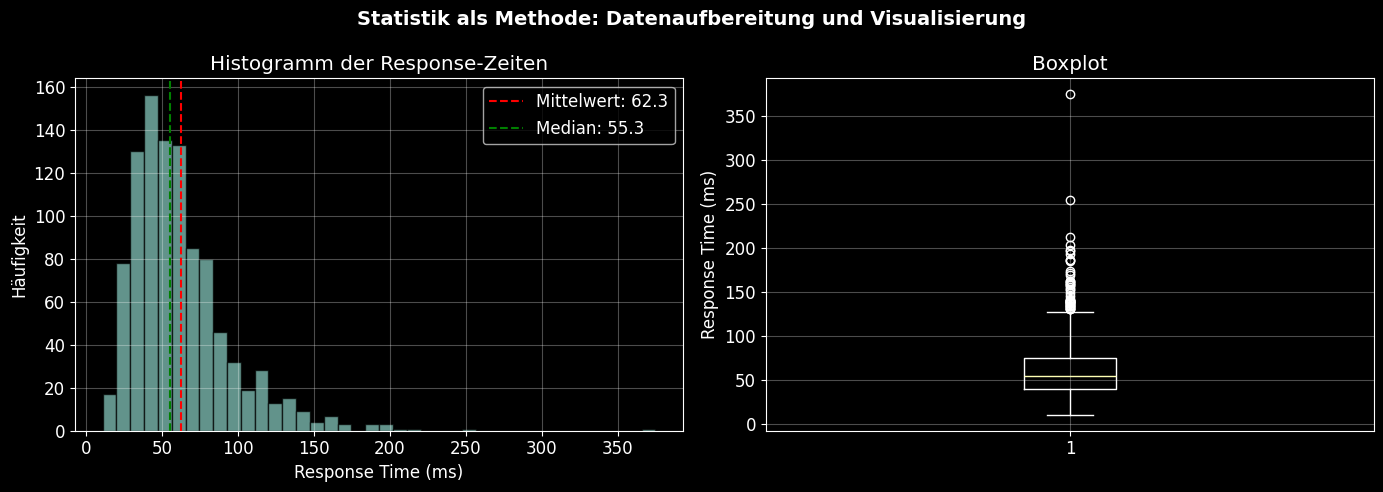

In [5]:
# Beispiel: Statistik als Methode - Log-Analyse
np.random.seed(42)

# Simulierte Response-Zeiten
response_times = np.random.lognormal(mean=4.0, sigma=0.5, size=1000)

# Statistische Methoden anwenden
print("=" * 60)
print("LOG-ANALYSE (Beispiel für 'Statistik als Methode')")
print("=" * 60)
print(f"\nAnzahl Messungen: {len(response_times)}")
print(f"Mittelwert: {np.mean(response_times):.2f} ms")
print(f"Median: {np.median(response_times):.2f} ms")
print(f"Standardabweichung: {np.std(response_times):.2f} ms")
print(f"95%-Percentil: {np.percentile(response_times, 95):.2f} ms")

# Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(response_times, bins=40, edgecolor='black', alpha=0.7)
ax1.axvline(np.mean(response_times), color='red', linestyle='--', label=f'Mittelwert: {np.mean(response_times):.1f}')
ax1.axvline(np.median(response_times), color='green', linestyle='--', label=f'Median: {np.median(response_times):.1f}')
ax1.set_xlabel('Response Time (ms)')
ax1.set_ylabel('Häufigkeit')
ax1.set_title('Histogramm der Response-Zeiten')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.boxplot(response_times, vert=True)
ax2.set_ylabel('Response Time (ms)')
ax2.set_title('Boxplot')
ax2.grid(alpha=0.3)

plt.suptitle('Statistik als Methode: Datenaufbereitung und Visualisierung', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3. Statistik als Wissenschaft

Mathematische Disziplin, die Modelle für **Zufall und Unsicherheit** entwickelt und untersucht, wie zuverlässig Schlussfolgerungen aus Stichproben sind.

**💻 Informatik-Beispiele:**
- Wahrscheinlichkeitstheorie für Kryptographie
- Stochastische Prozesse für Netzwerkanalyse
- Bayessche Inferenz für Machine Learning
- Statistische Lerntheorie

> **📌 Merksatz:**  
> In dieser Vorlesung steht Statistik vor allem als **Methode** und **Wissenschaft** im Vordergrund.

---

## Warum brauchen wir Statistik?

In vielen realen Situationen sind Ergebnisse **nicht deterministisch** und Daten **unvollständig**:

| Bereich | Unsicherheit / Unvollständigkeit |
|---------|----------------------------------|
| Qualitätskontrolle | Nicht jedes Teil wird geprüft |
| Umfragen | Nicht alle Personen werden befragt |
| IT-Systeme | Antwortzeiten und Ausfallraten schwanken |
| Wirtschaft | Nachfrage, Preise und Lieferzeiten variieren |

### 💻 Warum Informatiker Statistik brauchen

| Anwendungsbereich | Statistische Fragen |
|-------------------|---------------------|
| **Software-Testing** | Wie viele Tests reichen, um Qualität sicherzustellen? |
| **Performance-Optimierung** | Ist die neue Version wirklich schneller? |
| **Machine Learning** | Wie gut generalisiert mein Modell? |
| **Security** | Ist dieses Login-Verhalten anomal? |
| **Kapazitätsplanung** | Wie viele Server brauchen wir für Spitzenlasten? |
| **A/B-Testing** | Hat die Änderung einen signifikanten Effekt? |
| **Datenqualität** | Wie gehen wir mit fehlenden/fehlerhaften Daten um? |

In [6]:
# Beispiel: Warum wir Statistik brauchen - Variabilität in IT-Systemen
np.random.seed(42)

# Simuliere 5 identische Messungen derselben Operation
print("=" * 60)
print("WARUM STATISTIK? - Variabilität in IT-Systemen")
print("=" * 60)
print("\nDieselbe Datenbankabfrage, 5x ausgeführt:")

query_times = [12.3, 14.1, 11.8, 45.2, 13.5]  # ms
for i, t in enumerate(query_times, 1):
    print(f"  Messung {i}: {t} ms")

print(f"\nMittelwert: {np.mean(query_times):.1f} ms")
print(f"Median: {np.median(query_times):.1f} ms")
print(f"\n→ Messung 4 ist ein Ausreißer (evtl. Cache-Miss oder GC-Pause)")
print("→ Der Median (13.5 ms) ist repräsentativer als der Mittelwert (19.4 ms)")
print("\n💡 Statistik hilft uns, solche Situationen systematisch zu analysieren!")

WARUM STATISTIK? - Variabilität in IT-Systemen

Dieselbe Datenbankabfrage, 5x ausgeführt:
  Messung 1: 12.3 ms
  Messung 2: 14.1 ms
  Messung 3: 11.8 ms
  Messung 4: 45.2 ms
  Messung 5: 13.5 ms

Mittelwert: 19.4 ms
Median: 13.5 ms

→ Messung 4 ist ein Ausreißer (evtl. Cache-Miss oder GC-Pause)
→ Der Median (13.5 ms) ist repräsentativer als der Mittelwert (19.4 ms)

💡 Statistik hilft uns, solche Situationen systematisch zu analysieren!
